In [2]:
import pandas as pd
import pyreadstat as prs
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
long_df, long_meta = prs.read_sav('../data/uktus15_diary_ep_long.sav', encoding="latin1")
# wide_df, wide_meta = prs.read_sav('../data/uktus15_diary_wide.sav', encoding="latin1")
# time_vars_df, time_vars_meta = prs.read_sav('../data/uktus15_dv_time_vars.sav', encoding="latin1")
# household_df, household_meta = prs.read_sav('../data/uktus15_household.sav', encoding="latin1")
individual_df, individual_meta = prs.read_sav('../data/uktus15_individual.sav', encoding="latin1")
# wksched_df, wksched_meta = prs.read_sav('../data/uktus15_wksched.sav', encoding="latin1")

In [5]:
print(long_df.columns)

Index(['serial', 'strata', 'psu', 'pnum', 'daynum', 'HhOut', 'IndOut',
       'DMFlag', 'IMonth', 'IYear', 'DVAge', 'DayNum_DiaryDay', 'DPday',
       'DiaryDate_Act', 'DiaryDay_Act', 'DiaryDateDiff', 'dmonth', 'dyear',
       'ddayw', 'DiaryType', 'WhenDiary', 'AfterDiaryDay', 'WhereStart',
       'WhereEnd', 'RushedD', 'Ordinary', 'KindOfDay', 'Trip', 'dia_wt_a',
       'dia_wt_b', 'epnum', 'tid', 'eptime', 'whatdoing', 'What_Oth1',
       'What_Oth2', 'What_Oth3', 'WhereWhen', 'Device', 'WithAlone',
       'WithSpouse', 'WithMother', 'WithFather', 'WithChild', 'WithOther',
       'WithOtherYK', 'WithMiss', 'WithNA', 'Enjoy', 'impuflag'],
      dtype='object')


In [10]:
long_cols = ['DMFlag', 'dmonth', 'ddayw', 'WhereStart', 'WhereEnd', 'RushedD', 'KindOfDay', 'dia_wt_a', 'dia_wt_b', 'Trip', 'tid', 'Device', 'WhereWhen', 'whatdoing', 'eptime']

long = long_df.loc[:,long_cols]


In [11]:
long.head()

,DMFlag,dmonth,ddayw,WhereStart,WhereEnd,RushedD,KindOfDay,dia_wt_a,dia_wt_b,Trip,tid,Device,WhereWhen,whatdoing,eptime
0,2.0,12.0,1.0,1.0,1.0,2.0,3.0,2.021182,1.58118,1.0,1.0,0.0,11.0,110.0,110.0
1,2.0,12.0,1.0,1.0,1.0,2.0,3.0,2.021182,1.58118,1.0,12.0,0.0,11.0,8219.0,10.0
2,2.0,12.0,1.0,1.0,1.0,2.0,3.0,2.021182,1.58118,1.0,13.0,0.0,11.0,310.0,10.0
3,2.0,12.0,1.0,1.0,1.0,2.0,3.0,2.021182,1.58118,1.0,14.0,0.0,11.0,3210.0,10.0
4,2.0,12.0,1.0,1.0,1.0,2.0,3.0,2.021182,1.58118,1.0,15.0,1.0,11.0,3110.0,10.0


In [12]:
long.shape

(587632, 15)

In [18]:
long = long.dropna()

In [19]:
long.shape

(587543, 15)

In [22]:
X = long.iloc[:,0:14].values
y = long.iloc[:,-1].values

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 42)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [25]:
from sklearn.metrics import mean_squared_error
prediction = regressor.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print(mse)
print(rmse)

2309.3368199862157
48.05555971983071


In [41]:
## Define Grid 
from sklearn.model_selection import GridSearchCV
grid = { 
    'n_estimators': [300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6],
    'random_state' : [18]
}
## Grid Search function
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
CV_rfr.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [300, 400, 500],
                         'random_state': [18]})

In [42]:
CV_rfr.best_params_

{'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 300,
 'random_state': 18}

In [44]:
# Create and train model
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 6, random_state = 18)
rf.fit(X_train, y_train)
# Predict on test data
prediction = rf.predict(X_test)
# Compute mean squared error
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5

In [45]:
print(mse)
print(rmse)

2504.4824442201516
50.0448043678877


In [46]:
y1000_idx = np.random.choice(range(X_test.shape[0]), size = 50)
y1000 = y_test[y1000_idx]
p1000 = prediction[y1000_idx]

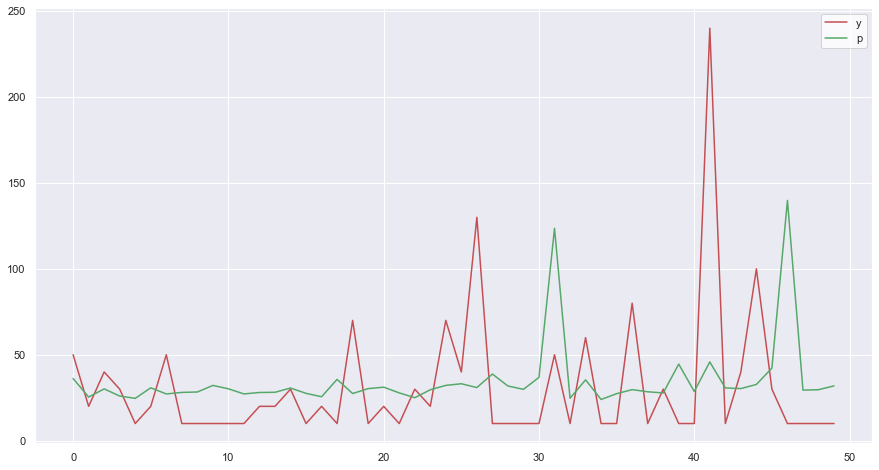

In [47]:
sns.set(rc={"figure.figsize":(15, 8)}) #width=3, #height=4
sns.lineplot(x = range(50), y = y1000, color='r')
sns.lineplot(x = range(50), y = p1000, color='g')
plt.legend(labels=['y','p'], facecolor='white')

In [48]:
from sklearn.metrics import r2_score

In [49]:
r2_score(y_test, prediction)


0.3699835969747024

In [51]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [52]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1920      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 166,785
Trainable params: 166,785
Non-trainable params: 0
_________________________________________________________________


In [53]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(filepath = "../models/" + checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [54]:
NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/500
9838/9842 [============================>.] - ETA: 0s - loss: 26.8992 - mean_absolute_error: 26.8992
Epoch 00001: val_loss improved from inf to 26.43560, saving model to ../models\Weights-001--26.43560.hdf5
9842/9842 [==============================] - 112s 11ms/step - loss: 26.8976 - mean_absolute_error: 26.8976 - val_loss: 26.4356 - val_mean_absolute_error: 26.4356
Epoch 2/500
9841/9842 [============================>.] - ETA: 0s - loss: 26.1262 - mean_absolute_error: 26.1262
Epoch 00002: val_loss improved from 26.43560 to 26.07349, saving model to ../models\Weights-002--26.07349.hdf5
9842/9842 [==============================] - 104s 11ms/step - loss: 26.1263 - mean_absolute_error: 26.1263 - val_loss: 26.0735 - val_mean_absolute_error: 26.0735
Epoch 3/500
9840/9842 [============================>.] - ETA: 0s - loss: 25.8503 - mean_absolute_error: 25.8503
Epoch 00003: val_loss improved from 26.07349 to 25.99549, saving model to ../models\Weights-003--25.99549.hdf5
9842/9842 [=